<a href="https://colab.research.google.com/github/Luisamfer/Ativ_Est_Desc/blob/main/Estat_desc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Definição da população#
#População Acessível: Agricultores Familiares que realizaram o Cadastro Nacional da Agricultura Familiar#
#Amostragem Não Probabilística Intencional: Agricultores da região Nordeste, tendo em vista a finalidade do estudo#
#Variável a ser analisada: Renda #
#Variável Quantitativa Contínua #
# Distribuição de Frequencia:   ABSOLUTA / RELATIVA / FREQ.ACUMULADA
# Medidas de Tendência Central: MÉDIA / MEDIANA / MODA
# Medidas de Dispersão: VARIÂNCIA / DESVIO PADRÃO / AMPLITUDE / INTERVALO INTERQUARTÍLICO
# Medidas de Posição: Quartis / DEcis / Percentis / Quantis
# Medidas de Forma: Curtose / Assimetria
# Medidas de Relação: Covarância / Correlação

In [7]:
# Importando as bibliotecas necessárias para análise dos dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
from datetime import datetime

In [8]:
# Importando o arquivo pelo Google Drive
from google.colab import drive

In [9]:
# Carregando arquivo de MEMBROS
drive.mount('/content/drive')

df_membros = pd.read_csv("/content/drive/My Drive/Colab Notebooks/MBA_Est_Desc_dados/MEMBROS.csv", sep=';', encoding='utf-8', dtype={
    "CAF":"string",
    "CODIGO_PESSOA":"string",
    "SEXO":"category",
    "ESCOLARIDADE":"category",
    "MAO_DE_OBRA_FAMILIAR":"category"
    })

# Converter 'DATA_NASCIMENTO' para formato datetime
df_membros["DATA_NASCIMENTO"] = pd.to_datetime(df_membros["DATA_NASCIMENTO"], dayfirst=True, errors='coerce')

# Calcular a idade
hoje = datetime.today()
df_membros["IDADE"] = df_membros["DATA_NASCIMENTO"].apply(lambda x: int(hoje.year - x.year - ((hoje.month, hoje.day) < (x.month, x.day))) if pd.notnull(x) else None)

df_membros.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CAF,CODIGO_PESSOA,SEXO,DATA_NASCIMENTO,ESCOLARIDADE,MAO_DE_OBRA_FAMILIAR,IDADE
0,AC012023.01.000103697CAF,228471,FEMININO,1950-02-17,ANALFABETO,SIM,75
1,AC012023.01.000103709CAF,228657,MASCULINO,1994-03-01,MEDIO_COMPLETO,SIM,31
2,AC012023.01.000103709CAF,228738,FEMININO,1998-03-01,MEDIO_COMPLETO,NÃO,27
3,AC012023.01.000103723CAF,228694,MASCULINO,1969-06-21,ANALFABETO,SIM,55
4,AC012023.01.000103723CAF,228735,FEMININO,1982-02-28,ANALFABETO,SIM,43


In [10]:
df_membros.info()
df_membros.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4535543 entries, 0 to 4535542
Data columns (total 7 columns):
 #   Column                Dtype         
---  ------                -----         
 0   CAF                   string        
 1   CODIGO_PESSOA         string        
 2   SEXO                  category      
 3   DATA_NASCIMENTO       datetime64[ns]
 4   ESCOLARIDADE          category      
 5   MAO_DE_OBRA_FAMILIAR  category      
 6   IDADE                 int64         
dtypes: category(3), datetime64[ns](1), int64(1), string(2)
memory usage: 151.4 MB


,DATA_NASCIMENTO,IDADE
count,4535543,4.535543e+06
mean,1982-11-09 22:08:21.858498432,4.182242e+01
min,1909-05-19 00:00:00,0.000000e+00
25%,1968-09-11 00:00:00,2.800000e+01
50%,1981-06-23 00:00:00,4.300000e+01
75%,1996-09-19 00:00:00,5.600000e+01
max,2025-02-13 00:00:00,1.150000e+02
std,NaN,1.837493e+01


In [11]:
def definir_faixa_etaria(IDADE):
  if IDADE <= 15:
    return "Menor de 15 anos"
  elif IDADE <= 29:
    return "16 a 29 anos"
  elif IDADE <= 39:
    return "30 a 39 anos"
  elif IDADE <= 49:
    return "40 a 49 anos"
  elif IDADE <= 59:
    return "50 a 59 anos"
  elif IDADE <= 69:
    return "60 a 69 anos"
  elif IDADE > 69: return "Mais de 70 anos"

  return pd.NA

df_membros['faixa_etaria'] = df_membros["IDADE"].apply(definir_faixa_etaria)
df_membros.head()

,CAF,CODIGO_PESSOA,SEXO,DATA_NASCIMENTO,ESCOLARIDADE,MAO_DE_OBRA_FAMILIAR,IDADE,faixa_etaria
0,AC012023.01.000103697CAF,228471,FEMININO,1950-02-17,ANALFABETO,SIM,75,Mais de 70 anos
1,AC012023.01.000103709CAF,228657,MASCULINO,1994-03-01,MEDIO_COMPLETO,SIM,31,30 a 39 anos
2,AC012023.01.000103709CAF,228738,FEMININO,1998-03-01,MEDIO_COMPLETO,NÃO,27,16 a 29 anos
3,AC012023.01.000103723CAF,228694,MASCULINO,1969-06-21,ANALFABETO,SIM,55,50 a 59 anos
4,AC012023.01.000103723CAF,228735,FEMININO,1982-02-28,ANALFABETO,SIM,43,40 a 49 anos


In [17]:
frequencia_fx_etaria = df_membros["faixa_etaria"].value_counts()
print(frequencia_fx_etaria)

faixa_etaria
50 a 59 anos        923505
40 a 49 anos        837857
16 a 29 anos        825369
30 a 39 anos        723919
60 a 69 anos        578001
Menor de 15 anos    410966
Mais de 70 anos     235926
Name: count, dtype: int64


In [18]:
tabela_cruzada = pd.crosstab(df_membros["faixa_etaria"], df_membros["MAO_DE_OBRA_FAMILIAR"], margins=True, margins_name="Total")
print(tabela_cruzada)

MAO_DE_OBRA_FAMILIAR     NÃO      SIM    Total
faixa_etaria                                  
16 a 29 anos          156047   669322   825369
30 a 39 anos           24176   699743   723919
40 a 49 anos           26328   811529   837857
50 a 59 anos           30717   892788   923505
60 a 69 anos           17445   560556   578001
Mais de 70 anos        11690   224236   235926
Menor de 15 anos      410839      127   410966
Total                 677242  3858301  4535543


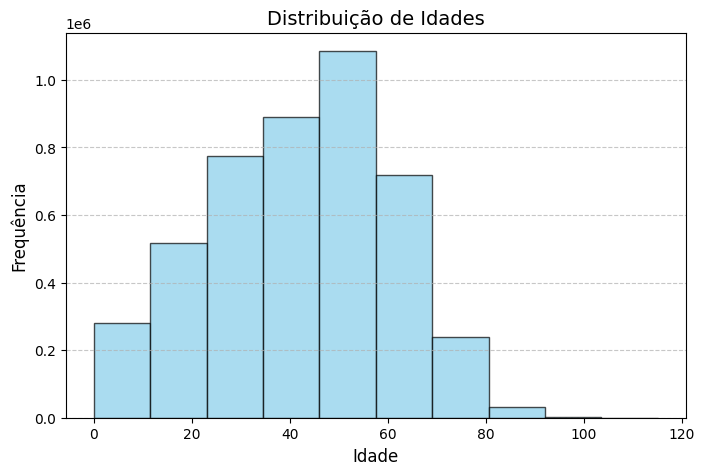

In [14]:
# CRIANDO HISTOGRAMA PARA AS IDADES DOS AGRICULTORES FAMILIARES
idades = df_membros["IDADE"]
plt.figure(figsize=(8, 5))  # Ajusta o tamanho do gráfico
plt.hist(idades, bins=10, color="skyblue", edgecolor="black", alpha=0.7)  # Personalização

# Adicionando rótulos e título
plt.xlabel("Idade", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.title("Distribuição de Idades", fontsize=14)

# Adicionando uma grade
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Exibindo o gráfico
plt.show()

In [ ]:
# Carregando arquivo de RENDA
drive.mount('/content/drive')

df_renda = pd.read_csv("/content/drive/My Drive/Colab Notebooks/MBA_Est_Desc_dados/RENDA.csv", sep=';', encoding='utf-8', dtype={
    "CAF":"string",
    "TIPO_RENDA":"string",
    "CATEGORIA_PRODUTO":"string",
    "PRODUTOL":"string",
    "VALOR_PRODUTO":"float"
}, decimal=",")

df_renda.info()



In [ ]:
df_renda.describe()

In [ ]:
# Carregando arquivo de ÁREA
#drive.mount('/content/drive')

#df_area = pd.read_csv("/content/drive/My Drive/Colab Notebooks/MBA_Est_Desc_dados/AREA.csv", sep=';', encoding='utf-8', dtype={
#    "CAF":"string",
#   "UF":"string",
#   "MUNICIPIO":"string",
#   "IMOVEL_PRINCIPAL":"category",
#   "USO_TERRA":"category"
#})

#df_area.info()
#df_area.describe()
